<a href="https://colab.research.google.com/github/Fissureee/PCVK/blob/main/Jobsheet7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.**

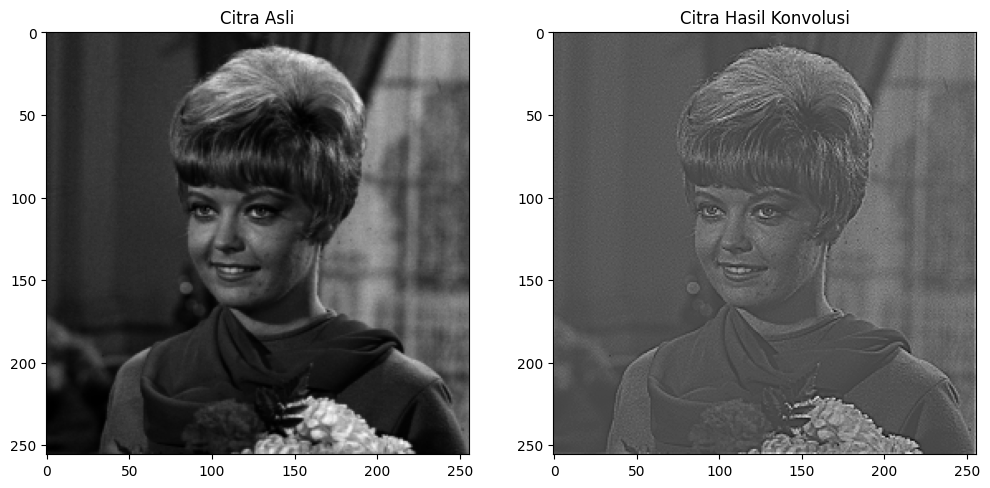

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Load image
image_path = '/content/drive/My Drive/PCVK_assets/female.tiff'
image = plt.imread(image_path)

# Convert to grayscale
if image.ndim == 3:
    gray_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
else:
    gray_image = image

# Fungsi konvolusi dengan padding otomatis
def convolve2d(image, kernel):
    # Dapatkan dimensi gambar dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Hitung padding yang diperlukan
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Tambahkan padding pada gambar
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Inisialisasi hasil konvolusi
    convolved = np.zeros_like(image)

    # Lakukan konvolusi
    for y in range(image_height):
        for x in range(image_width):
            region = padded_image[y:y + kernel_height, x:x + kernel_width]
            convolved[y, x] = np.sum(region * kernel)

    return convolved

# Kernel untuk filter sharpening
sharpen_kernel = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

# Lakukan konvolusi
convolved_image = convolve2d(gray_image, sharpen_kernel)

# Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(gray_image, cmap='gray'), plt.title('Citra Asli')
plt.subplot(1, 2, 2), plt.imshow(convolved_image, cmap='gray'), plt.title('Citra Hasil Konvolusi')
plt.show()

**3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:**

**Sharpen**

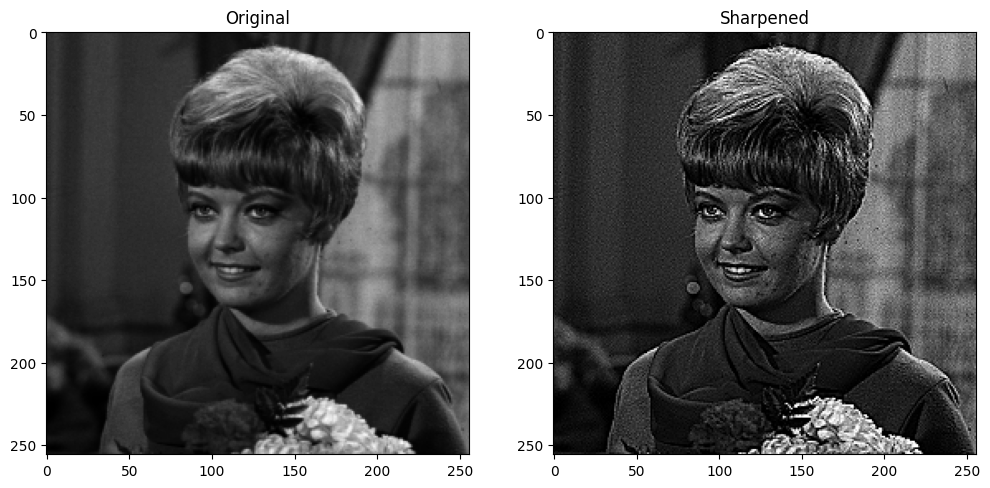

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread(image_path, 0)  # Load as grayscale

# Sharpen kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Apply filter
sharpened_img = cv2.filter2D(img, -1, sharpen_kernel)

# Display
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(sharpened_img, cmap='gray'), plt.title('Sharpened')
plt.show()

**Emboss**

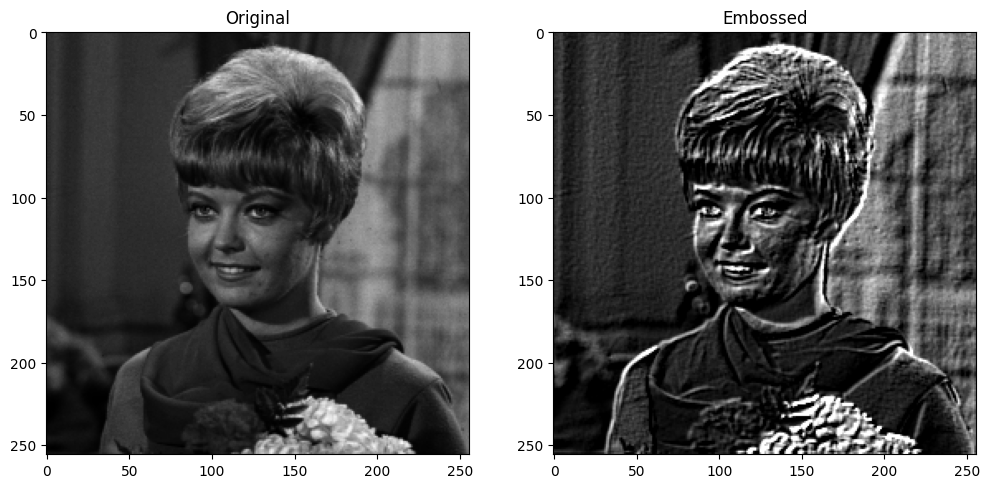

In [31]:
emboss_kernel = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])

embossed_img = cv2.filter2D(img, -1, emboss_kernel)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(embossed_img, cmap='gray'), plt.title('Embossed')
plt.show()

**Left Sobel Edge Detection**

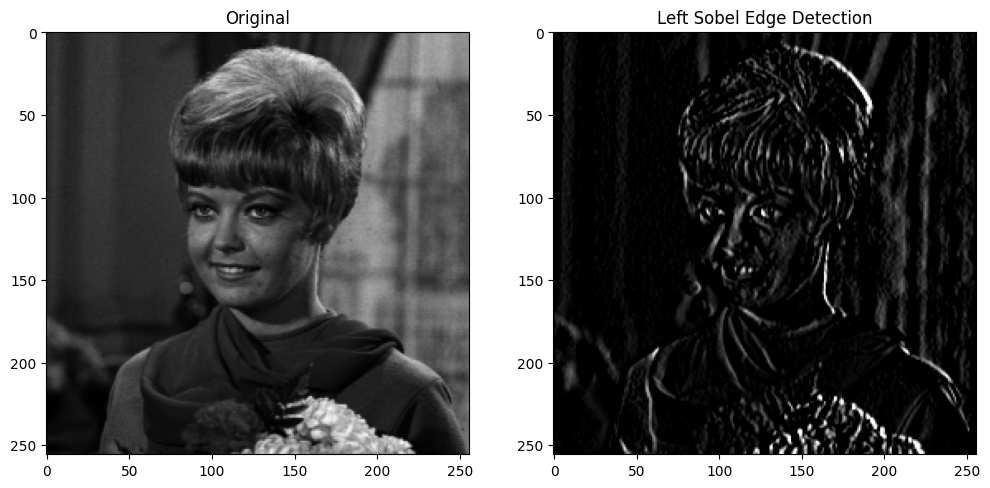

In [32]:
sobel_x_kernel = np.array([[1, 0, -1],
                          [2, 0, -2],
                          [1, 0, -1]])

sobel_x_img = cv2.filter2D(img, -1, sobel_x_kernel)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(sobel_x_img, cmap='gray'), plt.title('Left Sobel Edge Detection')
plt.show()

**Canny Edge Detection**

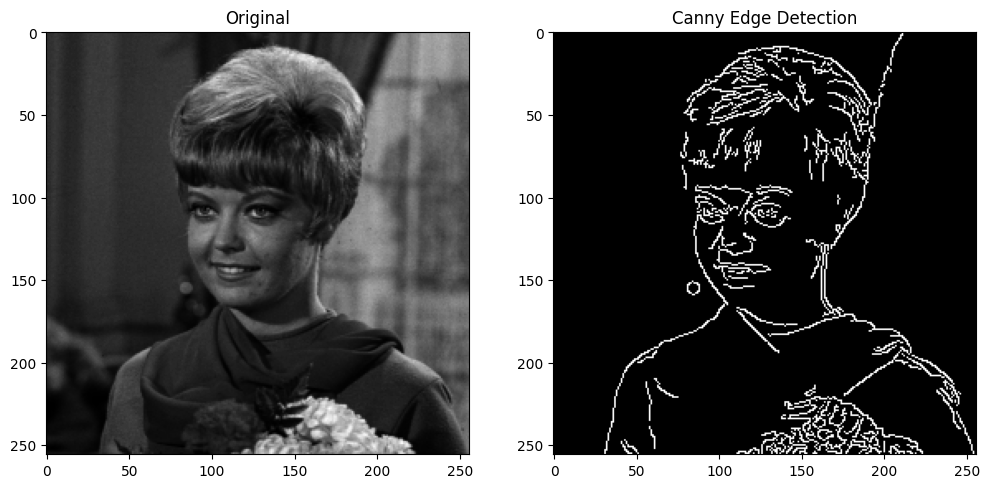

In [33]:
canny_img = cv2.Canny(img, threshold1=100, threshold2=200)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(canny_img, cmap='gray'), plt.title('Canny Edge Detection')
plt.show()

**Prewit Edge Detection**

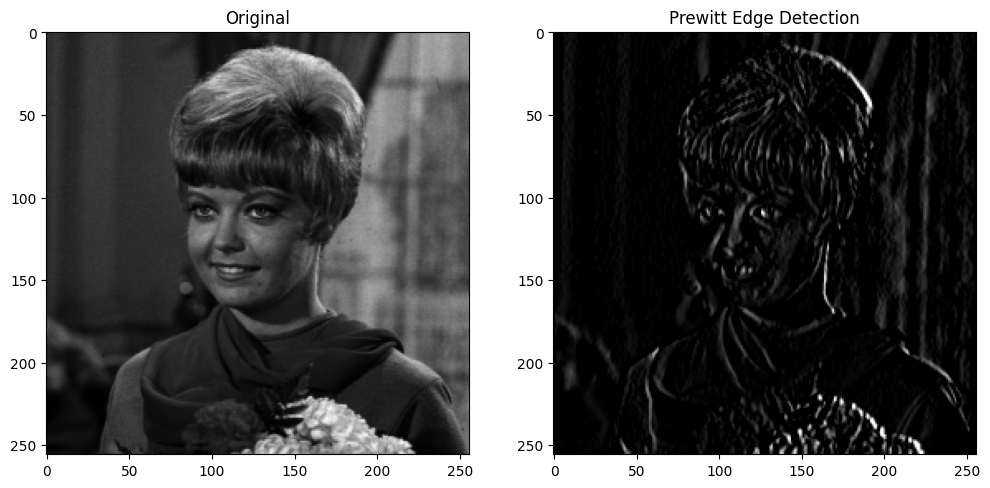

In [34]:
prewitt_x_kernel = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]])

prewitt_x_img = cv2.filter2D(img, -1, prewitt_x_kernel)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(prewitt_x_img, cmap='gray'), plt.title('Prewitt Edge Detection')
plt.show()

**5x5 Gaussian Blur**

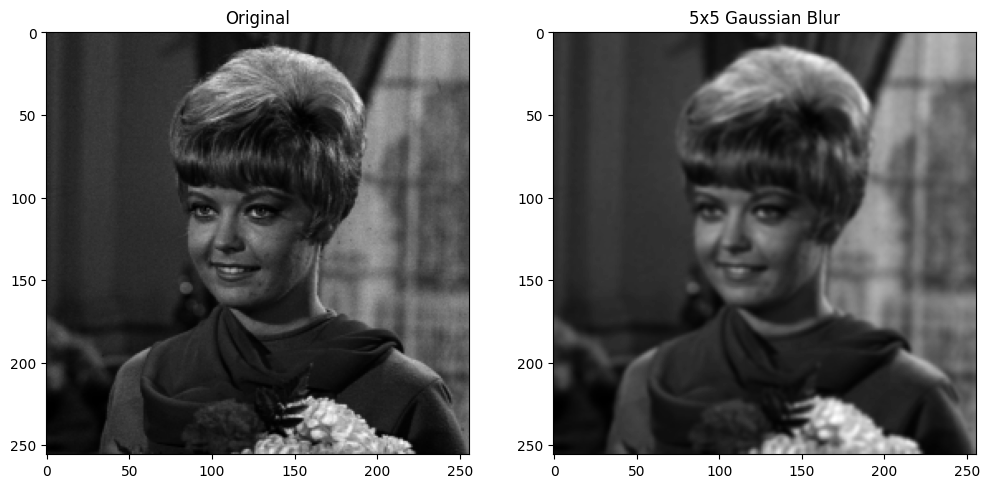

In [43]:
# Load image
img = cv2.imread(image_path, 0)  # Load as grayscale

# 5x5 Gaussian Blur
gaussian_kernel = np.array([[1, 4, 6, 4, 1],
                           [4, 16, 24, 16, 4],
                           [6, 24, 36, 24, 6],
                           [4, 16, 24, 16, 4],
                           [1, 4, 6, 4, 1]]) / 256

gaussian_filtered_5x5 = cv2.filter2D(img, -1, gaussian_kernel)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(gaussian_filtered_5x5, cmap='gray'), plt.title('5x5 Gaussian Blur')
plt.show()

**21x21 Gaussian Blur**

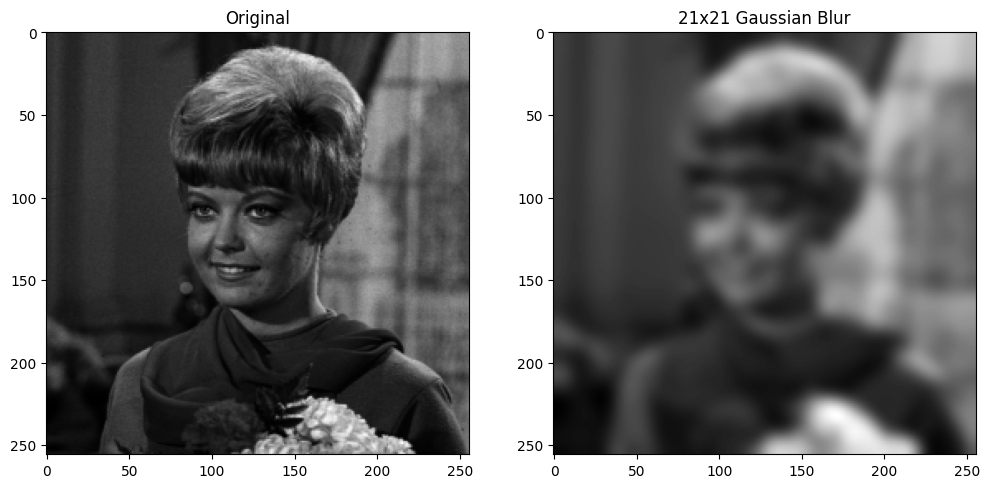

In [42]:
# Load image
img = cv2.imread(image_path, 0)  # Load as grayscale

# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
gaussian_kernel = gaussian_kernel @ gaussian_kernel.T

gaussian_filtered_21x21 = cv2.filter2D(img, -1, gaussian_kernel)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(gaussian_filtered_21x21, cmap='gray'), plt.title('21x21 Gaussian Blur')
plt.show()